# Лабораторная работа №2 "Реализация глубокой нейронной сети"

### Задание 1.
Реализуйте полносвязную нейронную сеть с помощью библиотеки Tensor Flow. В качестве алгоритма оптимизации можно использовать, например, стохастический градиент (Stochastic Gradient Descent, SGD). Определите количество скрытых слоев от 1 до 5, количество нейронов в каждом из слоев до нескольких сотен, а также их функции активации (кусочно-линейная, сигмоидная, гиперболический тангенс и т.д.).

In [3]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
from utils import get_dataset_by_url

Загружаем данные

In [4]:
url_large = "https://commondatastorage.googleapis.com/books1000/notMNIST_large.tar.gz"
X_large, y_large = get_dataset_by_url(url_large)

print(f"X large shape - {X_large.shape}")
print(f"y large shape - {y_large.shape}")

File already downloaded
Data already extracted
X large shape - (529114, 784)
y large shape - (529114,)


Теперь разделим данные на тренировочную, валидационную и тестовую выборки, а также избавимся от дубликатов.

In [5]:
from sklearn.model_selection import train_test_split
from utils import remove_duplicates

TRAIN_SIZE = 200 * 1000
VALID_SIZE = 10 * 1000
TEST_SIZE = 19 * 1000

X_train, X_temp, y_train, y_temp = train_test_split(X_large, y_large, train_size=TRAIN_SIZE, test_size=VALID_SIZE + TEST_SIZE, shuffle=True)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, train_size=VALID_SIZE, test_size=TEST_SIZE, shuffle=True)

X_train_clean, y_train_clean = remove_duplicates(X_train, y_train, X_valid, X_test)
print(f"New X_train size: {len(X_train_clean)}")

Removed 1.34%
New X_train size: 197319


Далее протестируем различные конфигурации нейронной сети. Пропробуем изменять количество скрытых слоёв, число нейронов на одном слое, функцию активации и оптимизатор.

In [21]:
from tensorflow.keras import layers

batch_size = 2 ** 6

In [74]:
def fit_and_evaluate(model):
    model.fit(X_train_clean, y_train_clean, epochs=10, batch_size=batch_size, verbose=0,
         validation_data=(X_valid, y_valid))
    return model.evaluate(X_test, y_test, verbose=2)

In [75]:
def test_model(num_l=3, num_n=128, act='relu', opt='adam'):
    model = keras.Sequential()
    model.add(layers.Dense(num_n, activation=act, input_shape=(28 * 28,)))

    for _ in range(num_l):
        model.add(layers.Dense(num_n, activation=act))

    model.add(layers.Dense(10, activation='softmax'))

    model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

    return fit_and_evaluate(model)

In [70]:
def test_number_of_hidden_layers():
    test_n = [1, 2, 3]
    losses = {}

    for num_l in test_n:
        res = test_model(num_l=num_l)
        losses[num_l] = res

    return losses

In [57]:
test_number_of_hidden_layers()

19000/19000 - 0s - loss: 0.3764 - accuracy: 0.8943
19000/19000 - 0s - loss: 0.3713 - accuracy: 0.8930
19000/19000 - 0s - loss: 0.3677 - accuracy: 0.8948


{1: [0.3763610389950244, 0.89426315],
 2: [0.3712799273258761, 0.893],
 3: [0.367673459649086, 0.89478946]}

In [78]:
def test_num_neurons():
    test_num_n = [64, 128, 256]
    losses = {}

    for num_n in test_num_n:
        res = test_model(num_n=num_n)
        losses[num_n] = res
    
    return losses

In [79]:
test_num_neurons()

19000/19000 - 0s - loss: 0.3799 - accuracy: 0.8870
19000/19000 - 0s - loss: 0.3643 - accuracy: 0.8949
19000/19000 - 0s - loss: 0.3623 - accuracy: 0.8997


{64: [0.37989429533089464, 0.887],
 128: [0.3643282897158673, 0.8948947],
 256: [0.3623388427307731, 0.8996842]}

In [71]:
def test_activation():
    test_act = ['relu', 'selu', 'sigmoid', 'tanh', 'linear']
    losses = {}

    for act in test_act:
        res = test_model(act=act)
        losses[act] = res
    
    return losses

In [72]:
test_activation()

19000/19000 - 0s - loss: 0.3561 - accuracy: 0.8960
19000/19000 - 0s - loss: 0.3597 - accuracy: 0.8970
19000/19000 - 0s - loss: 0.3759 - accuracy: 0.8852
19000/19000 - 0s - loss: 0.3689 - accuracy: 0.8898
19000/19000 - 0s - loss: 0.6656 - accuracy: 0.8236


{'relu': [0.3561312650522511, 0.896],
 'selu': [0.35974992910458853, 0.897],
 'sigmoid': [0.3758732114991075, 0.8852105],
 'tanh': [0.368909709535147, 0.8898421],
 'linear': [0.6656339487778513, 0.82357895]}

In [80]:
def test_optimizator():
    test_opt = ['adam', 'nadam', 'adagrad', 'sgd', 'rmsprop']
    losses = {}

    for opt in test_opt:
        res = test_model(opt=opt)
        losses[opt] = res
    
    return losses

In [81]:
test_optimizator()

19000/19000 - 0s - loss: 0.3570 - accuracy: 0.8971
19000/19000 - 0s - loss: 0.3577 - accuracy: 0.8963
19000/19000 - 0s - loss: 0.4896 - accuracy: 0.8565
19000/19000 - 0s - loss: 0.4111 - accuracy: 0.8759
19000/19000 - 0s - loss: 0.5436 - accuracy: 0.8550


{'adam': [0.3570465292295343, 0.8971053],
 'nadam': [0.3577336972383292, 0.8963158],
 'adagrad': [0.48959934623617873, 0.8564737],
 'sgd': [0.4110688520230745, 0.8758947],
 'rmsprop': [0.543591948929586, 0.855]}

Проведя тестирование, можем видеть, что нейронная сеть даёт наибольшую точность при следующей конфигурации:
* 3 скрытых слоя
* 256 нейронов на каждом скрытом слое
* функция активации - relu
* оптимизатор - adam

### Задание 2.
Как улучшилась точность классификатора по сравнению с логистической регрессией?

В этом задании применим полученную конфигурацию и проверим точность.

In [92]:
NUM_N = 256
ACT = 'relu'
OPT = 'adam'

In [87]:
model = keras.Sequential([
    layers.Dense(NUM_N, activation=ACT, input_shape=(28 * 28,)),
    layers.Dense(NUM_N, activation=ACT),
    layers.Dense(NUM_N, activation=ACT),
    layers.Dense(NUM_N, activation=ACT),
    layers.Dense(10, activation='softmax'), 
])

model.compile(optimizer=OPT, loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train_clean, y_train_clean, epochs=10, batch_size=batch_size,
          validation_data=(X_valid, y_valid))
model.evaluate(X_test, y_test, verbose=2)

Train on 197319 samples, validate on 10000 samples
Epoch 1/10
197319/197319 [==============================] - 7s 36us/sample - loss: 0.4761 - accuracy: 0.8558 - val_loss: 0.4073 - val_accuracy: 0.8736
Epoch 2/10
197319/197319 [==============================] - 7s 34us/sample - loss: 0.3693 - accuracy: 0.8864 - val_loss: 0.3731 - val_accuracy: 0.8867
Epoch 3/10
197319/197319 [==============================] - 7s 35us/sample - loss: 0.3301 - accuracy: 0.8977 - val_loss: 0.3526 - val_accuracy: 0.8948
Epoch 4/10
197319/197319 [==============================] - 7s 33us/sample - loss: 0.3015 - accuracy: 0.9057 - val_loss: 0.3547 - val_accuracy: 0.8964
Epoch 5/10
197319/197319 [==============================] - 6s 31us/sample - loss: 0.2801 - accuracy: 0.9120 - val_loss: 0.3448 - val_accuracy: 0.8967
Epoch 6/10
197319/197319 [==============================] - 6s 32us/sample - loss: 0.2624 - accuracy: 0.9174 - val_loss: 0.3437 - val_accuracy: 0.9001
Epoch 7/10
197319/197319 [=================

[0.36469914462829106, 0.8992105]

По сравнению с логистической регрессией из прошлой лабораторной работы точность классификатора улучшилась на ~7.5%

### Задание 3.
Используйте регуляризацию и метод сброса нейронов (dropout) для борьбы с переобучением. Как улучшилось качество классификации?

Попробуем подобрать перебором наилучшие параметры для L2 регуляризации и дропаута.

In [175]:
def train_model(reg_L=0, dropout_rate=0, verbose=1, callback=True, ret_history=False):
    callbacks = [
      tf.keras.callbacks.EarlyStopping(patience=1, monitor='val_loss'),
    ] if callback else []

    model = keras.Sequential([
        layers.Dense(NUM_N, activation=ACT, input_shape=(28 * 28,), kernel_regularizer=keras.regularizers.l2(reg_L)),
        layers.Dropout(dropout_rate),
        layers.Dense(NUM_N, activation=ACT, kernel_regularizer=keras.regularizers.l2(reg_L)),
        layers.Dropout(dropout_rate),
        layers.Dense(NUM_N, activation=ACT, kernel_regularizer=keras.regularizers.l2(reg_L)),
        layers.Dropout(dropout_rate),
        layers.Dense(NUM_N, activation=ACT, kernel_regularizer=keras.regularizers.l2(reg_L)),
        layers.Dropout(dropout_rate),
        layers.Dense(10, activation='softmax'), 
    ])

    model.compile(optimizer=OPT, loss='sparse_categorical_crossentropy',
                  metrics=['accuracy', 'sparse_categorical_crossentropy'])
    history = model.fit(X_train_clean, y_train_clean, epochs=20, batch_size=batch_size, verbose=verbose,
              validation_data=(X_valid, y_valid), callbacks=callbacks)
    if ret_history:
        return history
    return model

In [176]:
def test_model_regularization(reg_L=0, dropout_rate=0, verbose=1, ret_history=False):
    model = train_model(reg_L=reg_L, dropout_rate=dropout_rate, verbose=verbose, ret_history=ret_history)
    return model.evaluate(X_test, y_test, verbose=2)

In [177]:
def test_dropout():
    test_dropout_rate = [0.1, 0.2, 0.3, 0.4]
    losses = {}

    for dropout_rate in test_dropout_rate:
        res = test_model_regularization(dropout_rate=dropout_rate, reg_L=1e-5, verbose=1)
        losses[dropout_rate] = res
    
    return losses

In [178]:
test_dropout()

Train on 197319 samples, validate on 10000 samples
Epoch 1/20
197319/197319 [==============================] - 13s 65us/sample - loss: 0.5313 - accuracy: 0.8444 - sparse_categorical_crossentropy: 0.5169 - val_loss: 0.4637 - val_accuracy: 0.8640 - val_sparse_categorical_crossentropy: 0.4466
Epoch 2/20
197319/197319 [==============================] - 12s 62us/sample - loss: 0.4329 - accuracy: 0.8748 - sparse_categorical_crossentropy: 0.4128 - val_loss: 0.4024 - val_accuracy: 0.8828 - val_sparse_categorical_crossentropy: 0.3793
Epoch 3/20
197319/197319 [==============================] - 13s 64us/sample - loss: 0.4039 - accuracy: 0.8851 - sparse_categorical_crossentropy: 0.3779 - val_loss: 0.3973 - val_accuracy: 0.8879 - val_sparse_categorical_crossentropy: 0.3684
Epoch 4/20
197319/197319 [==============================] - 12s 63us/sample - loss: 0.3865 - accuracy: 0.8915 - sparse_categorical_crossentropy: 0.3551 - val_loss: 0.3860 - val_accuracy: 0.8914 - val_sparse_categorical_crossentro

{0.1: [0.3977037507295609, 0.8928421, 0.3492833],
 0.2: [0.41046777338103246, 0.88542104, 0.37171686],
 0.3: [0.44564605849040184, 0.8765263, 0.41206387],
 0.4: [0.469758532348432, 0.8691579, 0.43627846]}

In [179]:
def test_l2_regularization():
    test_l2 = [3e-5, 1e-4, 3e-4, 1e-3]
    losses = {}

    for l2 in test_l2:
        res = test_model_regularization(reg_L=l2, dropout_rate=0.2, verbose=1)
        losses[l2] = res
    
    return losses

In [180]:
test_l2_regularization()

Train on 197319 samples, validate on 10000 samples
Epoch 1/20
197319/197319 [==============================] - 13s 65us/sample - loss: 0.5958 - accuracy: 0.8331 - sparse_categorical_crossentropy: 0.5563 - val_loss: 0.4788 - val_accuracy: 0.8649 - val_sparse_categorical_crossentropy: 0.4345
Epoch 2/20
197319/197319 [==============================] - 12s 61us/sample - loss: 0.4969 - accuracy: 0.8658 - sparse_categorical_crossentropy: 0.4476 - val_loss: 0.4444 - val_accuracy: 0.8817 - val_sparse_categorical_crossentropy: 0.3907
Epoch 3/20
197319/197319 [==============================] - 12s 61us/sample - loss: 0.4735 - accuracy: 0.8756 - sparse_categorical_crossentropy: 0.4161 - val_loss: 0.4405 - val_accuracy: 0.8835 - val_sparse_categorical_crossentropy: 0.3797
Epoch 4/20
197319/197319 [==============================] - 12s 62us/sample - loss: 0.4620 - accuracy: 0.8808 - sparse_categorical_crossentropy: 0.3983 - val_loss: 0.4291 - val_accuracy: 0.8887 - val_sparse_categorical_crossentro

{3e-05: [0.45082773719335856, 0.88478947, 0.37761676],
 0.0001: [0.5140314410109269, 0.87489474, 0.4143285],
 0.0003: [0.5496702245662087, 0.8695263, 0.42873338],
 0.001: [0.6041058320999145, 0.85778946, 0.46538794]}

Отсюда видим, что лучшими параметрами для нейронной сети являеются:
* dropout rate - 0.1
* l2 coefficient - 3e-05 

In [184]:
REG_L = 3e-5
DROPOUT_RATE = 0.1

In [181]:
def plot_history(histories, key='loss'):
    plt.figure(figsize=(16,10))

    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
                       '--', label=name.title()+' Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
                 label=name.title()+' Train')

        plt.xlabel('Epochs')
        plt.ylabel(key.replace('_',' ').title())
        plt.legend()

        plt.xlim([0,max(history.epoch)])

In [182]:
non_reg_history = train_model(reg_L=0, dropout_rate=0, verbose=0, callback=False, ret_history=True)
reg_history = train_model(reg_L=3e-5, dropout_rate=0.1, verbose=0, callback=False, ret_history=True)

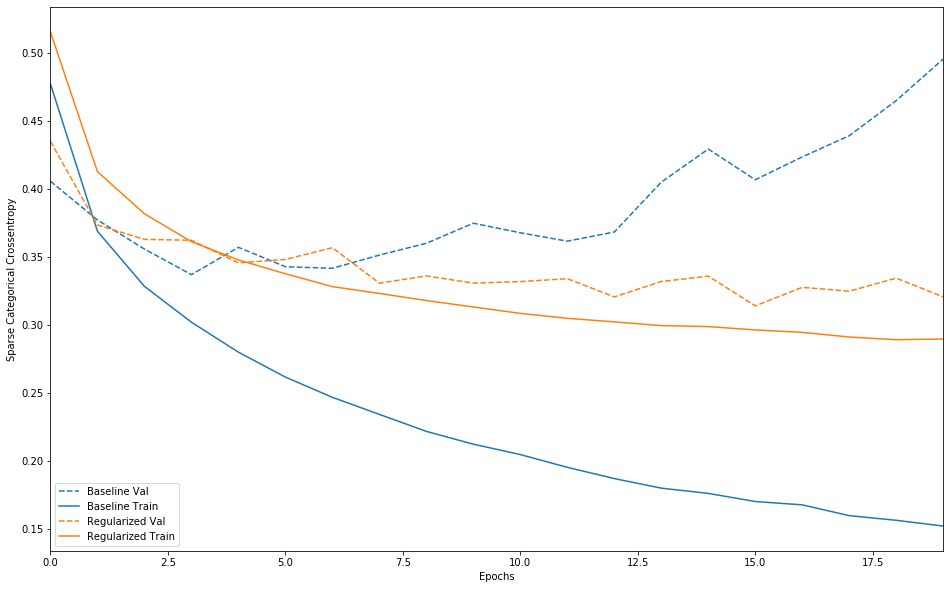

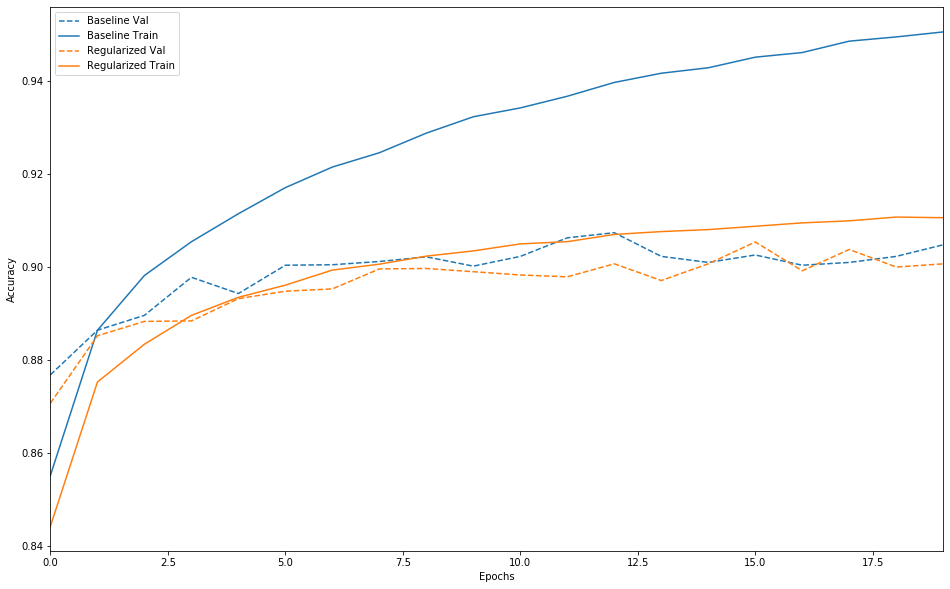

In [183]:
plot_history([('baseline', non_reg_history),
              ('Regularized', reg_history)], key='sparse_categorical_crossentropy')
plot_history([('baseline', non_reg_history),
              ('Regularized', reg_history)], key='accuracy')

Из графиков видно, что модель без регуляризации склонна к переобучению, а добавив регуляряцию модель перестала переобучаться. Хотя на точность модели это особо не повлияло.

### Задание 4.
Воспользуйтесь динамически изменяемой скоростью обучения (learning rate). Наилучшая точность, достигнутая с помощью данной модели составляет 97.1%. Какую точность демонстрирует Ваша реализованная модель?

Попробуем подобрать параметр learning rate. Для этого обучим модель с разными выборочными параметрами и выберем тот, который покажет найбольшую точность.

In [204]:
def train_model_with_lr(lr=1, epochs=20, verbose=1, callback=True):
    callbacks = [
      tf.keras.callbacks.EarlyStopping(patience=2, monitor='val_loss'),
    ] if callback else []

    model = keras.Sequential([
        layers.Dense(NUM_N, activation=ACT, input_shape=(28 * 28,), kernel_regularizer=keras.regularizers.l2(REG_L)),
        layers.Dropout(DROPOUT_RATE),
        layers.Dense(NUM_N, activation=ACT, kernel_regularizer=keras.regularizers.l2(REG_L)),
        layers.Dropout(DROPOUT_RATE),
        layers.Dense(NUM_N, activation=ACT, kernel_regularizer=keras.regularizers.l2(REG_L)),
        layers.Dropout(DROPOUT_RATE),
        layers.Dense(NUM_N, activation=ACT, kernel_regularizer=keras.regularizers.l2(REG_L)),
        layers.Dropout(DROPOUT_RATE),
        layers.Dense(10, activation='softmax'), 
    ])

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=lr),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy', 'sparse_categorical_crossentropy'])
    model.fit(X_train_clean, y_train_clean, epochs=epochs, batch_size=batch_size, verbose=verbose, callbacks=callbacks,
              validation_data=(X_valid, y_valid))

    return model.evaluate(X_test, y_test, verbose=2)

In [208]:
def test_optimizer():
    test_lr = [1e-4, 3e-4, 1e-3, 3e-3, 1e-2]
    losses = {}

    for lr in test_lr:
        res = train_model_with_lr(lr, verbose=0)
        losses[lr] = res
    
    return losses

In [209]:
test_optimizer()

19000/19000 - 1s - loss: 0.3609 - accuracy: 0.9036 - sparse_categorical_crossentropy: 0.3246
19000/19000 - 0s - loss: 0.3606 - accuracy: 0.9037 - sparse_categorical_crossentropy: 0.3141
19000/19000 - 0s - loss: 0.4254 - accuracy: 0.8938 - sparse_categorical_crossentropy: 0.3471
19000/19000 - 1s - loss: 0.5273 - accuracy: 0.8711 - sparse_categorical_crossentropy: 0.4292
19000/19000 - 0s - loss: 0.7632 - accuracy: 0.8038 - sparse_categorical_crossentropy: 0.6481


{0.0001: [0.3609323658817693, 0.90363157, 0.32463127],
 0.0003: [0.3605759682090659, 0.9037368, 0.31414926],
 0.001: [0.42542395107369674, 0.8938421, 0.3470636],
 0.003: [0.5272718216619994, 0.87110525, 0.42920008],
 0.01: [0.763209219204752, 0.8037895, 0.6481339]}

Отсюда видно, что модель показывает наибольшую точность при параметре learning rate = 0.0003. Подставим его в модель, обучим её и проверим точность на тестовой выборке.

In [210]:
train_model_with_lr(3e-4, epochs=30, callback=False)

Train on 197319 samples, validate on 10000 samples
Epoch 1/30
197319/197319 [==============================] - 13s 67us/sample - loss: 0.5600 - accuracy: 0.8413 - sparse_categorical_crossentropy: 0.5249 - val_loss: 0.4463 - val_accuracy: 0.8735 - val_sparse_categorical_crossentropy: 0.4107
Epoch 2/30
197319/197319 [==============================] - 12s 62us/sample - loss: 0.4331 - accuracy: 0.8782 - sparse_categorical_crossentropy: 0.3970 - val_loss: 0.4090 - val_accuracy: 0.8864 - val_sparse_categorical_crossentropy: 0.3725
Epoch 3/30
197319/197319 [==============================] - 12s 61us/sample - loss: 0.3925 - accuracy: 0.8905 - sparse_categorical_crossentropy: 0.3555 - val_loss: 0.3834 - val_accuracy: 0.8939 - val_sparse_categorical_crossentropy: 0.3460
Epoch 4/30
197319/197319 [==============================] - 12s 61us/sample - loss: 0.3677 - accuracy: 0.8980 - sparse_categorical_crossentropy: 0.3298 - val_loss: 0.3700 - val_accuracy: 0.8976 - val_sparse_categorical_crossentro

[0.40067883603196397, 0.9097369, 0.34078962]

Реализованная мною модель показала точность ~91%.